<a href="https://colab.research.google.com/github/eliasakalu/ICogLabs_AI_Projects/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Modeling Non‑Linear Relationships with Polynomial Regression**

### 📌 Description
This project demonstrates how polynomial regression can capture curved patterns in data that linear regression cannot. The dataset below is synthetic but designed to show a clear quadratic trend. You’ll fit both linear and polynomial models, compare their performance, and visualize how polynomial regression bends to fit the data.

<table style="width:100%">
  <tr>
    <th>x</th>
    <th>y</th>
  </tr>
  <tr><td>1</td><td>2</td></tr>
  <tr><td>2</td><td>5</td></tr>
  <tr><td>3</td><td>10</td></tr>
  <tr><td>4</td><td>17</td></tr>
  <tr><td>5</td><td>26</td></tr>
  <tr><td>6</td><td>37</td></tr>
  <tr><td>7</td><td>50</td></tr>
  <tr><td>8</td><td>65</td></tr>
  <tr><td>9</td><td>82</td></tr>
  <tr><td>10</td><td>101</td></tr>
</table>

In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
x=np.array([1,2,3,4,5,6,7,8,9,10])
y=np.array([2,5,10,17,26,37,50,65,82,101])

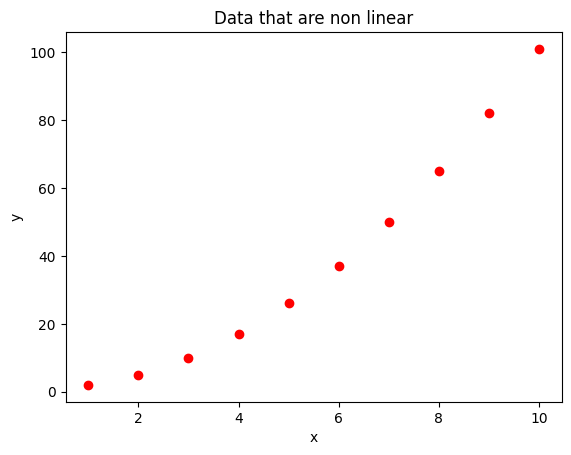

In [114]:
#Visualize the data
plt.scatter(x,y,color="red",label="date scatter")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data that are non linear")
plt.show()

In [115]:
def cost(X,y,W,b):
  m=X.shape[0]
  cost=0
  y_pred=X@W+b
  cost=np.sum((y_pred-y)**2)
  cost/=(2*m)
  return cost
def gradient_descent(X,y,W,b,a,iter):
  m=X.shape[0]
  for i in range(iter):
    dj_dw=(1/m)*X.T@(X@W+b-y)
    dj_db=(1/m)*np.sum(X@W+b-y)

    W=W-a*dj_dw
    b=b-a*dj_db
  return W,b
def polynomial(x,degree):
  x=np.vstack([x**i for i in range(1,degree+1)]).T
  return x

In [122]:
X=polynomial(x,2)
W=np.zeros(X.shape[1])
b=0
alpha=1e-4
iteration=1000000
W_final,b_final=gradient_descent(X,y,W,b,alpha,iteration)
print(f"W={W_final} and b={b_final} with cost={cost(X,y,W_final,b_final)}")
print(f"Rounded W={np.round(W_final,2)}, and B={b_final:.2f} with cost{cost(X,y,W_final,b_final):.6f}")

W=[6.45698119e-04 9.99948062e-01] and b=0.9983440726618773 with cost=9.946552306792891e-08
Rounded W=[0. 1.], and B=1.00 with cost0.000000


# ***Optional Section || Visualize***

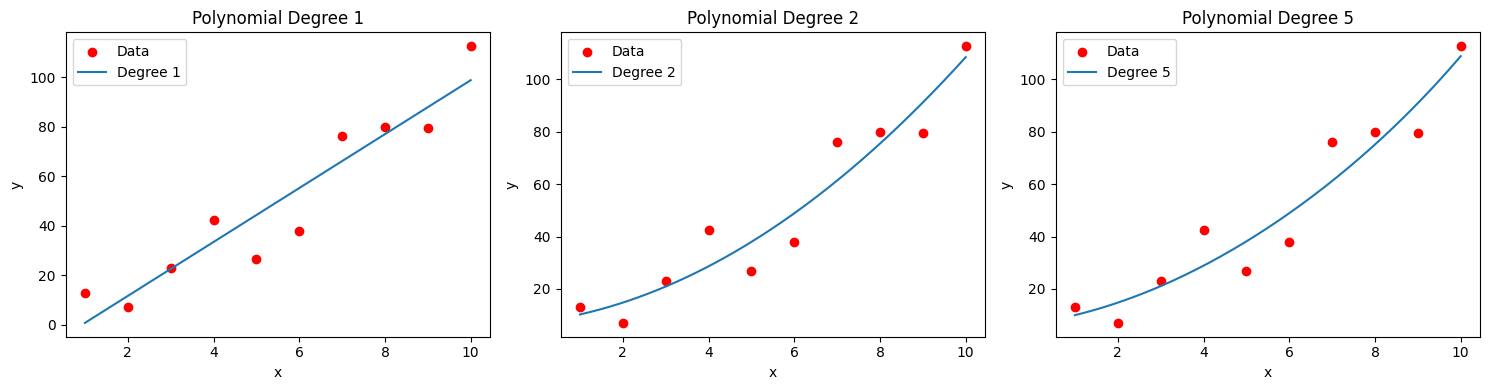

In [135]:
#Optional Section ||  Underfitting vs Justright vs Overfitting
# Add Gaussian noise
np.random.seed(42)  # reproducibility
noise = np.random.normal(loc=2, scale=4.0, size=y.shape)  # mean=2, std=4
y = y + noise

x_col = x.reshape(-1, 1)
y_col = y.reshape(-1, 1)

degrees = [1, 2, 5]
plt.figure(figsize=(15, 4))

alpha = 0.05
iterations = 50000

for i, deg in enumerate(degrees, 1):

    # -------- Polynomial features (INLINE) --------
    X = np.hstack([x_col ** d for d in range(1, deg + 1)])  # (m, n)
    m, n = X.shape

    # -------- Feature scaling (Z-score) --------
    mu = np.mean(X, axis=0, keepdims=True)
    sigma = np.std(X, axis=0, keepdims=True)
    X = (X - mu) / sigma

    # -------- Parameters --------
    W = np.zeros((n, 1))
    b = 0

    # -------- Training --------
    for _ in range(iterations):
        y_pred = X @ W + b
        error = y_pred - y_col

        dW = (1/m) * (X.T @ error)
        db = (1/m) * np.sum(error)

        W -= alpha * dW
        b -= alpha * db

    # -------- Inference (use same scaling) --------
    x_range = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)
    X_range = np.hstack([x_range ** d for d in range(1, deg + 1)])
    X_range = (X_range - mu) / sigma

    y_range_pred = X_range @ W + b

    # -------- Plot --------
    plt.subplot(1, 3, i)
    plt.scatter(x, y, color='red', label='Data')
    plt.plot(x_range, y_range_pred, label=f'Degree {deg}')
    plt.title(f'Polynomial Degree {deg}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

# **Using Scikit Learn**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# model=Pipeline([
#     ('poly',PolynomialFeatures(degree=1)),
#      ('scaler',StandardScaler()),
#     ('linear',LinearRegression())
# ]) Use this for efficency and clean code if the bottom not clear my friends

# Reshape x into column vector
x_temp = x.reshape(-1,1)

# 1.Expand features into polynomial terms
poly = PolynomialFeatures(degree=2, include_bias=True) #include bias true means separate the constant b
X_poly = poly.fit_transform(x_temp)

# 2.(Optional) Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# 3.Fit linear regression
model = LinearRegression()
model.fit(X_poly, y)   # or use X_scaled if you want normalized features

# 4. Extract weights and bias
W = model.coef_
b = model.intercept_

print(f"{" "*2}[1{" "*20}x{" "*20}x^2]")
print(f"W={W}")
print(f"bias={b}")
print(f"but total b=W[0]*1+b b={W[0]*1+b} and W[1] is coef for x and W[2] for x^2")